# 1. Introduction

<table class="tfo-notebook-buttons" align="left">
  
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/pantelis/PRML/blob/master/notebooks/ch01_Introduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You need to adjust the directory names below for your own account
# e.g. you may elect to create ms-notebooks dir or not

# Execute this cell once

# 1. Download the repo and set it as the current directory
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks
!git clone https://github.com/pantelis/PRML
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML

# 2. install the project/module
!python setup.py install



In [3]:
# 3. Add the project directory to the path
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
import os, sys
sys.path.append(os.getcwd())

/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML


In [4]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

## 1.1. Example: Polynomial Curve Fitting

The cell below defines $p_{data}(y|x)$ and generates the $\hat p_{data}(y|x)$

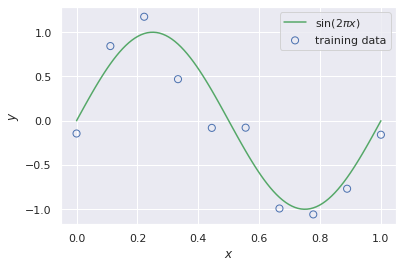

In [13]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size) # p(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape) 
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

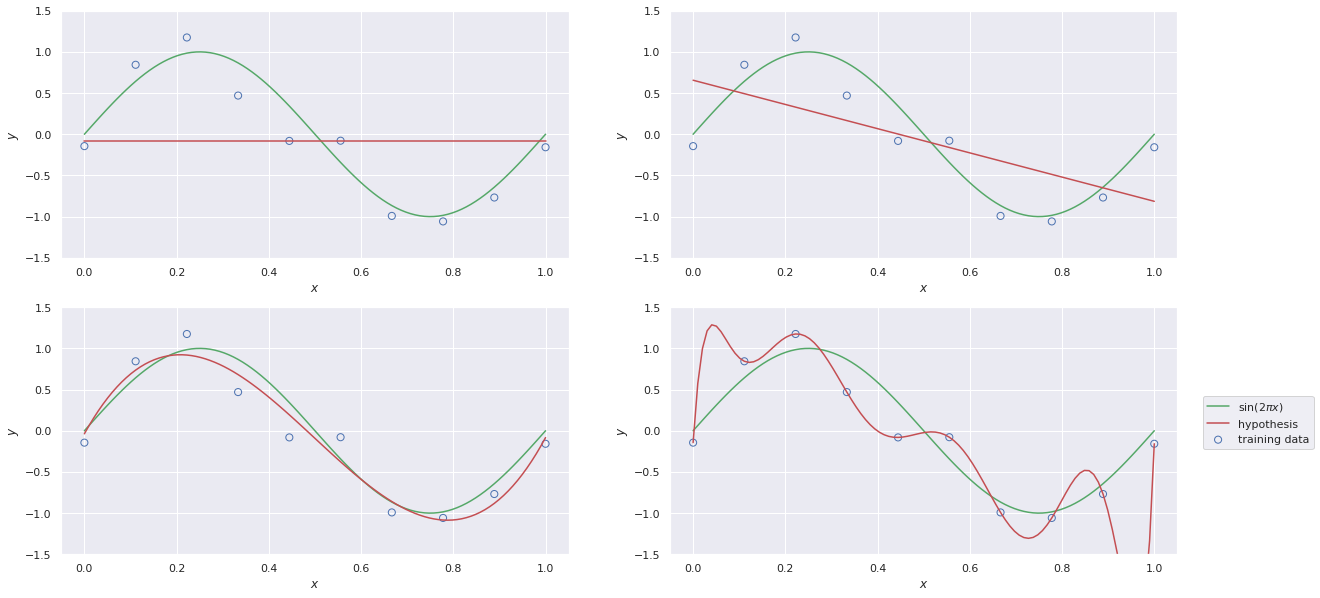

In [64]:
plt.subplots(figsize=(20, 10))
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="hypothesis")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()


**Model Complexity**

In this example, m = 3 is actually a better model than m = 9. M = 9 is more complex and better fits this data, but it is too good. It is so precise that it will not work for any other data. This is called overfitting. m = 3 is a better approximation because it hasn't been trained too much in this certain data so it will still work for other data. M = 9 will have a test error of 0, but it would still be better to use m = 3.

M =  0: 
Weight: -0.07915723331770269 
Squared Norm: 0.07915723331770269
M =  1: 
Weight: 0.6559137521838143 -1.470141971003035 
Squared Norm: 1.6098261599342145
M =  3: 
Weight: -0.03673430036772012 10.1204842889044 -30.76011132060278 20.59321339411567 
Squared Norm: 38.37564902385684
M =  6: 
Weight: -0.16504728344273228 19.193126766303184 -107.70346887313192 272.12002789869973 -394.67007134842675 300.7564492310122 -89.67801068157422 
Squared Norm: 583.334211853369
M =  9: 
Weight: -0.1443315965609191 88.71239312824787 -1936.8849452216236 18710.00092953945 -95275.57330967975 278053.4553143749 -481209.49041622406 487667.6080409914 -267100.5174119308 61002.67573580642 
Squared Norm: 794475.4652331615


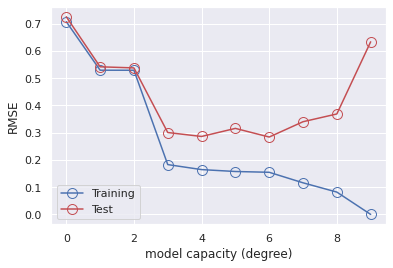

In [62]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    if i in ([0, 1, 3, 6, 9]):
        print('M = ', i, end=': \n')
        print('Weight: ', end='')
        for w in model.w:
          print(w, end=' ')
        print('\nSquared Norm: ', end='')
        print(np.linalg.norm(model.w))
    


    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))


plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

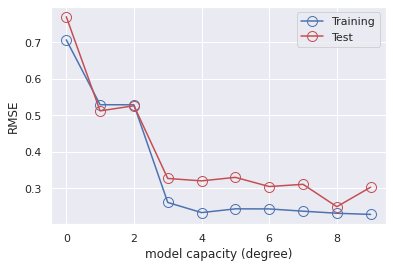

In [66]:
def rmse2(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = RidgeRegression(alpha=1e-3)
    model.fit(X_train, y_train)
    y = model.predict(X_test)
   
    


    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))


plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

**Loss function**

The loss funtion, Root Mean Squared Error, is used to find how far from the data our hypothesis is. We first find the difference from the actual value and our predicted value which is called the error. The error is then squared since adding negative and positive values cancel each other out. We then average out all the errors squared to get the error for all the data and not just one point. Finally, we square root the average which tells us how close our hypothesis is. This is why the loss function is called Root Mean Squared Error(RMSE).

#### Regularization

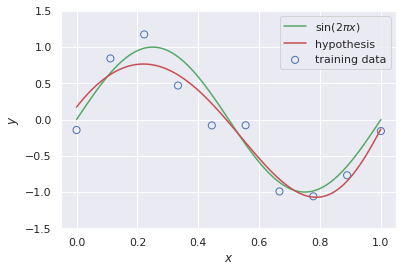

In [37]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

#y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="hypothesis")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.show()

The hypothesis was very similar to the actual. The ridge Regression loss function worked well.

### 1.2.6 Bayesian curve fitting

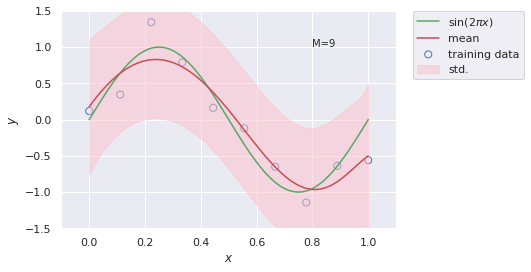

In [ ]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()